In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [83]:
team_stats = pd.read_csv('team_stats.csv')
player_stats = pd.read_csv('player_stats.csv')
season_standings = pd.read_csv('standing_stats.csv')
season_standings.head()

,Team,W,L,W/L%,PS/G,PA/G,SRS,Season,Conference
0,BOSTON CELTICS,50,32,0.610,99.2,95.6,3.37,2009-2010,East
1,TORONTO RAPTORS,40,42,0.488,104.1,105.9,-1.83,2009-2010,East
2,NEW YORK KNICKS,29,53,0.354,102.1,105.9,-4.01,2009-2010,East
3,PHILADELPHIA 76ERS,27,55,0.329,97.7,101.6,-3.93,2009-2010,East
4,NEW JERSEY NETS,12,70,0.146,92.4,101.5,-8.93,2009-2010,East


In [84]:
teams = team_stats.loc[team_stats['Team'].isin(['CLEVELAND CAVALIERS','MIAMI HEAT','LOS ANGELES LAKERS'])]
standings = season_standings.loc[season_standings['Team'].isin(['CLEVELAND CAVALIERS','MIAMI HEAT','LOS ANGELES LAKERS'])]
teams.head()

,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season
9,CLEVELAND CAVALIERS,82,19780,3101,6391,0.485,602,1582,0.381,2499,...,791,2692,3483,1835,564,425,1137,1591,8373,2009-2010
11,LOS ANGELES LAKERS,82,19830,3144,6875,0.457,532,1562,0.341,2612,...,973,2662,3635,1730,612,400,1096,1592,8339,2009-2010
24,MIAMI HEAT,82,19880,2984,6518,0.458,494,1426,0.346,2490,...,875,2553,3428,1548,605,457,1079,1710,7914,2009-2010
37,MIAMI HEAT,82,19780,3031,6301,0.481,547,1479,0.370,2484,...,790,2666,3456,1639,544,430,1142,1674,8369,2010-2011
38,LOS ANGELES LAKERS,82,19830,3128,6757,0.463,524,1487,0.352,2604,...,989,2616,3605,1801,602,422,1073,1555,8321,2010-2011


In [85]:
standings.describe(include='all')

,Team,W,L,W/L%,PS/G,PA/G,SRS,Season,Conference
count,33,33.000000,33.000000,33.000000,33.00000,33.000000,33.000000,33,33
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,11,2
top,MIAMI HEAT,NaN,NaN,NaN,NaN,NaN,NaN,2013-2014,East
freq,11,NaN,NaN,NaN,NaN,NaN,NaN,3,22
mean,NaN,40.787879,38.636364,0.513879,102.60303,102.675758,-0.140303,NaN,NaN
std,NaN,14.267002,14.423978,0.176973,5.26287,6.478765,5.224510,NaN,NaN
min,NaN,17.000000,16.000000,0.207000,93.00000,92.500000,-9.390000,NaN,NaN
25%,NaN,27.000000,25.000000,0.329000,98.50000,97.300000,-4.870000,NaN,NaN
50%,NaN,44.000000,37.000000,0.549000,102.20000,101.500000,0.770000,NaN,NaN
75%,NaN,52.000000,47.000000,0.659000,104.60000,107.600000,4.150000,NaN,NaN


In [86]:
standings.info()
player_stats.info()
teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 5 to 320
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Team        33 non-null     object 
 1   W           33 non-null     int64  
 2   L           33 non-null     int64  
 3   W/L%        33 non-null     float64
 4   PS/G        33 non-null     float64
 5   PA/G        33 non-null     float64
 6   SRS         33 non-null     float64
 7   Season      33 non-null     object 
 8   Conference  33 non-null     object 
dtypes: float64(4), int64(2), object(3)
memory usage: 2.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6785 entries, 0 to 6784
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  6785 non-null   object 
 1   Pos     6785 non-null   object 
 2   Age     6785 non-null   int64  
 3   Tm      6785 non-null   object 
 4   G       6785 non-null   int64  
 5   GS      6785 

<AxesSubplot:>

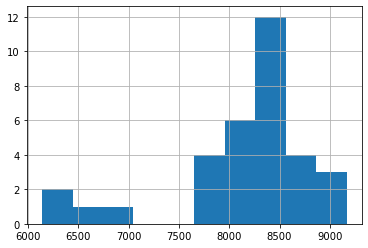

In [87]:
teams.PTS.hist()

<AxesSubplot:>

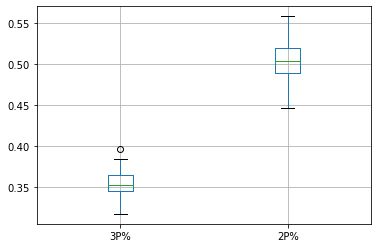

In [88]:
teams.boxplot(column=['3P%','2P%'])

In [91]:
dfx = standings[['Team','W/L%','Season']]
dfx[['season_start','season_end']] = dfx.Season.str.split("-",expand=True)
dfx = dfx.astype({'season_start': 'int64', 'season_end': 'int64'})
dfx.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Team,W/L%,Season,season_start,season_end
5,CLEVELAND CAVALIERS,0.744,2009-2010,2009,2010
12,MIAMI HEAT,0.573,2009-2010,2009,2010
24,CLEVELAND CAVALIERS,0.232,2010-2011,2010,2011
25,MIAMI HEAT,0.707,2010-2011,2010,2011
39,CLEVELAND CAVALIERS,0.318,2011-2012,2011,2012


<AxesSubplot:xlabel='season_end'>

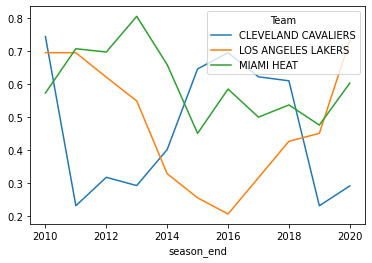

In [81]:
dfx = dfx.pivot(index='season_end', columns=['Team'], values='W/L%')
dfx.plot()